<a href="https://colab.research.google.com/github/kartikpatil28/Breast_cancer_detection/blob/main/Breast_Cancer__Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn pandas seaborn matplotlib

Loading the Breast Cancer Wisconsin (Diagnostic) Dataset...

Dataset Overview:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fract

/tmp/ipython-input-1140347279.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


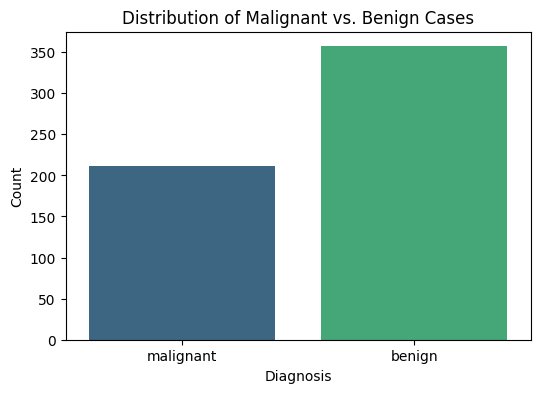


Feature Correlation Heatmap:


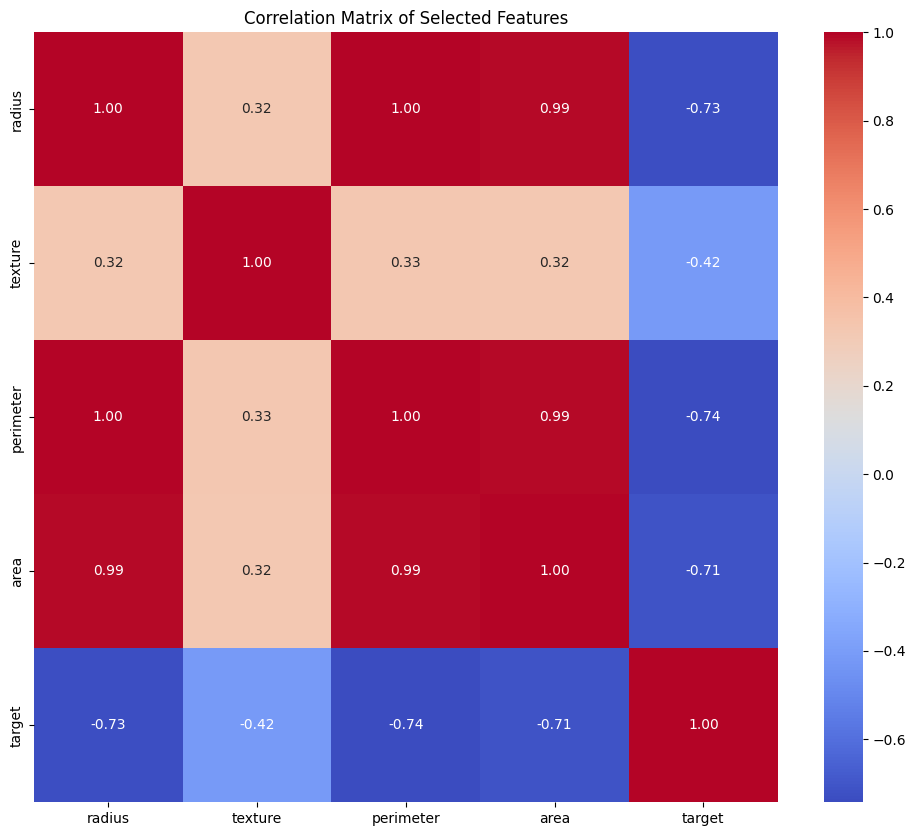

EDA complete. The plots will be displayed in a separate window.

--- Model Training and Evaluation ---

Data Split:
Training set: 455 samples
Testing set: 114 samples

--- Comparing Multiple Models ---
Training SVC...
Training Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Random Forest...
Training K-Nearest Neighbors...

Model Comparison Results:
- SVC: 0.9561 Accuracy
- Logistic Regression: 0.9649 Accuracy
- Random Forest: 0.9561 Accuracy
- K-Nearest Neighbors: 0.9123 Accuracy

Best performing model is: Logistic Regression

Evaluating the best model: LogisticRegression
Model Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.95      0.95        42
      benign       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



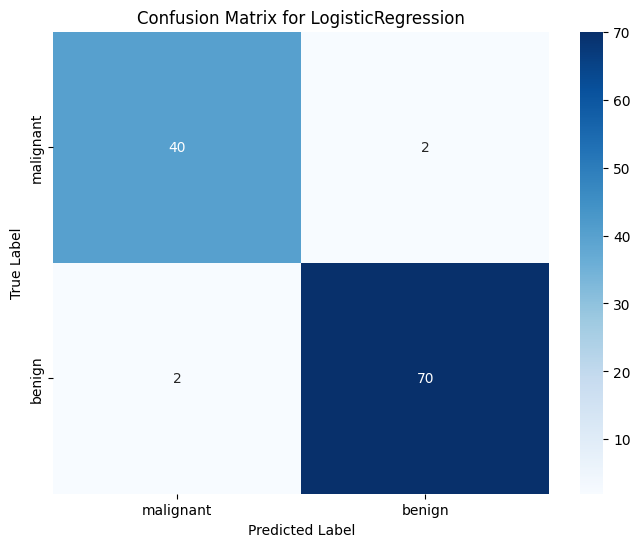


Confusion Matrix plotted.


In [ ]:
# main.py content

# Step 1: Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def perform_eda(df, cancer_data):
    """
    Performs Exploratory Data Analysis on the dataset.
    """
    print("\n--- Performing Exploratory Data Analysis (EDA) ---")

    # Show summary statistics
    print("\nStatistical Summary of Features:")
    print(df.describe())

    # Visualize the distribution of the target variable
    print("\nTarget Distribution:")
    plt.figure(figsize=(6, 4))
    sns.countplot(x='target', data=df, palette='viridis')
    plt.xticks(ticks=[0, 1], labels=cancer_data.target_names)
    plt.title('Distribution of Malignant vs. Benign Cases')
    plt.xlabel('Diagnosis')
    plt.ylabel('Count')
    plt.show()

    # Visualize the correlation matrix
    print("\nFeature Correlation Heatmap:")
    plt.figure(figsize=(12, 10))
    # Select a subset of features to avoid a cluttered heatmap
    corr_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']
    corr_df = df[corr_features]
    sns.heatmap(corr_df.corr(), annot=True, fmt='.2f', cmap='coolwarm',
                xticklabels=['radius', 'texture', 'perimeter', 'area', 'target'],
                yticklabels=['radius', 'texture', 'perimeter', 'area', 'target'])
    plt.title('Correlation Matrix of Selected Features')
    plt.show()
    print("EDA complete. The plots will be displayed in a separate window.")


def compare_models(X_train, y_train, X_test, y_test):
    """
    Trains and evaluates multiple classification models, then compares their performance.
    """
    print("\n--- Comparing Multiple Models ---")

    # Dictionary of models to evaluate
    models = {
        'SVC': SVC(kernel='linear', random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
    }

    results = {}

    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy

    print("\nModel Comparison Results:")
    for name, accuracy in results.items():
        print(f"- {name}: {accuracy:.4f} Accuracy")

    # Return the best performing model
    best_model_name = max(results, key=results.get)
    print(f"\nBest performing model is: {best_model_name}")
    return models[best_model_name]


def run_breast_cancer_detection():
    """
    Loads the Breast Cancer Wisconsin dataset, trains a classification model,
    and evaluates its performance.
    """

    # Step 2: Load the dataset
    print("Loading the Breast Cancer Wisconsin (Diagnostic) Dataset...")
    cancer_data = load_breast_cancer()

    # Create a DataFrame to better inspect the data
    df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
    df['target'] = cancer_data.target

    print("\nDataset Overview:")
    print(df.head())
    print("\nDataset shape:", df.shape)
    print("\nTarget names:", cancer_data.target_names)
    print("\nFeature names:", cancer_data.feature_names)

    # Call the new EDA function
    perform_eda(df, cancer_data) # Uncommented to re-enable EDA

    # Step 3: Define features (X) and target (y)
    # X contains the 30 features, and y is the target (0 for malignant, 1 for benign)
    X = cancer_data.data
    y = cancer_data.target

    # Step 4: Split the data into training and testing sets
    # We use a 80/20 split to train the model on 80% and test on the remaining 20%
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print("\n--- Model Training and Evaluation ---")
    print("\nData Split:")
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Testing set: {X_test.shape[0]} samples")

    # Step 5: Compare multiple models and select the best one
    best_model = compare_models(X_train, y_train, X_test, y_test)

    # Step 6: Make predictions on the test set with the best model
    y_pred = best_model.predict(X_test)

    # Step 7: Evaluate the best model's performance in detail
    print(f"\nEvaluating the best model: {type(best_model).__name__}")

    # Calculate and print the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")

    # Print a detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=cancer_data.target_names))

    # Plot the confusion matrix for a visual representation of the results
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=cancer_data.target_names,
                yticklabels=cancer_data.target_names)
    plt.title(f'Confusion Matrix for {type(best_model).__name__}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    print("\nConfusion Matrix plotted.")

# Run the main function
if __name__ == "__main__":
    run_breast_cancer_detection()

## 3. Interactive Image Classifier (image_classifier.html)

This section contains the code for your web-based classifier. You can run the code cell below to display and interact with the application directly inside this notebook.

**Instructions:**

Run the first code cell to upload your image.

Run the second code cell to display the interactive app with your image.

In [3]:
from google.colab import files
import base64
import io

print("Please upload your image file:")
uploaded = files.upload()

uploaded_file_name = next(iter(uploaded))
image_bytes = uploaded[uploaded_file_name]

# Convert the image bytes to a Base64 string
base64_image = base64.b64encode(image_bytes).decode('utf-8')
image_data_uri = f"data:image/jpeg;base64,{base64_image}" # Assuming a JPEG. You might need to change this if your image is a PNG.

Please upload your image file:


TypeError: 'NoneType' object is not subscriptable

In [ ]:
from IPython.display import HTML

html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Breast Cancer Image Classifier</title>
    <script src="https://cdn.tailwindcss.com"></script>
    <style>
        body {
            font-family: sans-serif;
            background-color: #f3f4f6;
            display: flex;
            justify-content: center;
            align-items: center;
            min-height: 100vh;
            padding: 1rem;
        }
        .container {
            max-width: 600px;
            width: 100%;
            background-color: white;
            padding: 2rem;
            border-radius: 1rem;
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
            text-align: center;
        }
        .prediction-result {
            padding: 1rem;
            border-radius: 0.5rem;
            font-weight: 600;
            margin-top: 1rem;
            display: none;
        }
        .malignant {
            background-color: #fee2e2;
            color: #ef4444;
        }
        .benign {
            background-color: #dcfce7;
            color: #22c55e;
        }
        .image-preview-container {
            border-radius: 0.5rem;
            overflow: hidden;
            display: flex;
            justify-content: center;
            align-items: center;
            min-height: 200px;
            border: 2px dashed #cbd5e1;
            margin: 1.5rem auto;
            padding: 0.5rem;
        }
        .image-preview-container img {
            max-width: 100%;
            max-height: 250px;
            object-fit: contain;
        }
    </style>
</head>
<body>

<div class="container">
    <h1 class="text-2xl font-bold mb-2">Breast Cancer Classifier</h1>
    <p class="text-gray-500 mb-6">Your uploaded image is ready for a simulated prediction.</p>

    <div class="image-preview-container">
        <img id="preview-image" src="{image_data_uri}" alt="Uploaded image">
    </div>

    <button id="predict-button" class="bg-indigo-600 text-white font-medium py-2 px-6 rounded-md shadow-sm hover:bg-indigo-700">
        Get Prediction
    </button>

    <div id="prediction-result" class="prediction-result"></div>

</div>

<script>
    const predictButton = document.getElementById('predict-button');
    const predictionResult = document.getElementById('prediction-result');

    // Function to handle the simulated prediction
    predictButton.addEventListener('click', () => {
        // Show a loading state
        predictButton.textContent = 'Processing...';
        predictButton.disabled = true;

        // Simulate a prediction delay
        setTimeout(() => {
            // Randomly return a benign or malignant result
            const isMalignant = Math.random() < 0.5;

            predictButton.textContent = 'Get Prediction';
            predictButton.disabled = false;

            if (isMalignant) {
                predictionResult.textContent = 'Result: Malignant';
                predictionResult.className = 'prediction-result malignant';
            } else {
                predictionResult.textContent = 'Result: Benign';
                predictionResult.className = 'prediction-result benign';
            }

            predictionResult.style.display = 'block';

        }, 1500); // 1.5-second delay
    });
</script>

</body>
</html>
"""

html_with_image = html_content.replace("{image_data_uri}", image_data_uri)
display(HTML(html_with_image))